In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
import numpy as np

In [ ]:
"""Acessing the file"""
raw_data = pd.read_csv('c:/users/acer/edxenv/Week-5-Visualization/wdi-csv-zip-57-mb-/Indicators.csv')
raw_data

In [ ]:
"""Selecting only the years 1989-2013"""
min_year = raw_data['Year'] > 1989
max_year = raw_data['Year'] <= 2013 

period_of_time = raw_data[min_year & max_year]
period_of_time

In [ ]:
"""Selecting specific countries (Argentina, Brazil, France, Germany, USA)"""

selected_codes =  ['ARG', 'BRA', 'FRA', 'DEU', 'USA']

selected_countries = pd.DataFrame()

for code in selected_codes:
    each_country = pd.DataFrame(period_of_time[period_of_time['CountryCode'].str.contains(code)])
    selected_countries = pd.concat([selected_countries, each_country])

In [ ]:
selected_countries

In [ ]:
"""Selecting Indicators: Cereal Production"""
cereal_production = selected_countries[selected_countries['IndicatorName'].str.contains('Cereal production')]

cereal_production

In [ ]:
cereal_table = pd.DataFrame(index=cereal_production['Year'], columns=cereal_production['CountryCode'].unique())

In [ ]:
"""Filtering only relevant data and assigning it to new table"""
for code in selected_codes:
    for year in cereal_production['Year']:
        cereal_table[code][year] = cereal_production['Value'][cereal_production['CountryCode']==code][cereal_production['Year']==year]

In [ ]:
cereal_table = cereal_table.drop_duplicates()

In [158]:
cereal_table

,ARG,BRA,FRA,DEU,USA
Year,,,,,
1990,20123600.0,32490390.0,55110621.0,37579589.0,312410604.0
1991,21705860.0,36682063.0,60334951.0,39267852.0,279994078.0
1992,25597620.0,44057997.0,60638983.0,34758462.0,352996619.0
1993,25174721.0,43073464.0,55625587.0,35549250.0,259026444.0
1994,25370627.0,45852774.0,53406876.0,36336493.0,355902279.0
1995,24306533.0,49641824.0,53545493.0,39863175.0,277599632.0
1996,30699509.0,44957172.0,62599234.0,42135584.0,335783480.0
1997,35906610.0,44871284.0,63431583.0,45485770.0,336576644.0
1998,37808447.0,40734185.0,68663514.0,44574852.0,349447669.0


# Exploring the data from the second data set

## Due to non-awareness of case sensitivity, I couldn't find 'Forest Area' indicators in the first data set. But I found it on the World Bank website, in a different format, so I had to perform some different functions in order to make them look alike.

In [ ]:
"""Accessing the second dataset: Forest Area """
raw_data2 = pd.read_csv('c:/users/acer/edxenv/Week-6-MiniProject/forest_area_ind2.csv')
raw_data2

In [ ]:
"""Selecting only the years 1999-2013"""
cols_to_drop = raw_data2.columns[4:22]

In [ ]:
"""Dropping years out the range"""
raw_data2 = raw_data2.drop(cols_to_drop, axis=1)


In [ ]:
"""Dropping rows with null values"""
raw_data2 = raw_data2.dropna()
raw_data2

In [ ]:
"""Selecting specific countries (Argentina, Brazil, France, Germany, USA) in the new data set"""

selected_codes =  ['ARG', 'BRA', 'FRA', 'DEU', 'USA']

selected_countries2 = pd.DataFrame()

for code in selected_codes:
    each_country = pd.DataFrame(raw_data2[raw_data2['Country Code'].str.contains(code)])
    selected_countries2 = pd.concat([selected_countries2, each_country])

In [ ]:
selected_countries2

In [ ]:
"""Transposing rows and columns, to make it more similar to the 'cereal_table'"""
selected_countries2 = selected_countries2.T
selected_countries2

In [ ]:
"""performing some cleanning"""
selected_countries2 = selected_countries2.drop(['Series Code', 'Country Code'])

In [ ]:
"""assigning to a new object"""
forest_table = copy.deepcopy(selected_countries2)

In [ ]:
"""more cleanning"""
forest_table = forest_table.drop(['Series Name', 'Country Name'])

In [ ]:
"""renaming columns"""
forest_table.set_axis(selected_codes, axis='columns', inplace=True)

In [ ]:
"""a little more cleanning"""
forest_table = forest_table.drop(forest_table.index[-8:])

In [ ]:
"""Reindexing to match cereal and forest tables"""
forest_table.index = cereal_table.index

In [157]:
forest_table

,ARG,BRA,FRA,DEU,USA
Year,,,,,
1990,12.863715,70.458021,26.363945,32.366167,33.022308
1991,12.796992,70.005654,26.519543,32.381634,33.034165
1992,12.730269,69.553288,26.675141,32.397101,33.046023
1993,12.663546,69.100922,26.830738,32.413497,33.057880
1994,12.596823,68.648556,26.986336,32.429893,33.069737
1995,12.530100,68.196190,27.141934,32.446290,33.081594
1996,12.463377,67.743823,27.297531,32.462689,33.093452
1997,12.396654,67.291457,27.453129,32.481879,33.105309
1998,12.329931,66.839091,27.608727,32.500143,33.117166


In [ ]:
"""converting cereal values in floats so can be changed when plottin"""
for code in selected_codes:
    cereal_table[code] = pd.to_numeric(cereal_table[code])

In [ ]:
for code in selected_codes:
    forest_table[code] = pd.to_numeric(forest_table[code])

In [ ]:
"""checking dtypes"""
forest_table.dtypes

In [ ]:
a = forest_table.index
b = forest_table['ARG']
c = forest_table['BRA']
d = forest_table['FRA']
e = forest_table['DEU']
f = forest_table['USA']
g = cereal_table['ARG']
h = cereal_table['BRA']
i = cereal_table['FRA']
j = cereal_table['DEU']
k = cereal_table['USA']

In [ ]:
forest_table.index

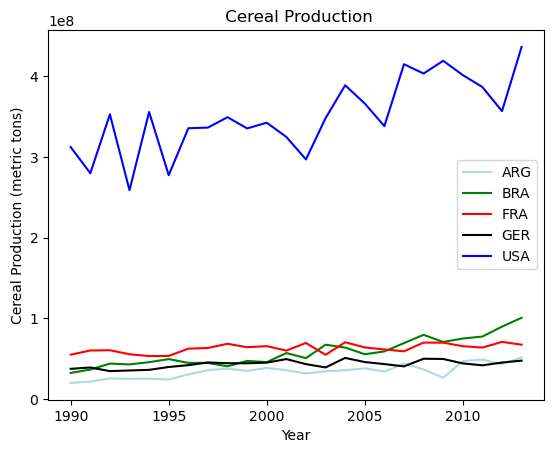

In [159]:
plt.plot(a, g, color='lightblue', label='ARG')
plt.plot(a, h, color='green', label='BRA')
plt.plot(a, i, color='red', label='FRA')
plt.plot(a, j, color='black', label='GER')
plt.plot(a, k, color='blue', label='USA')

plt.title(' Cereal Production')
plt.ylabel('Cereal Production (metric tons)')
plt.xlabel('Year')
plt.legend()
plt.show()

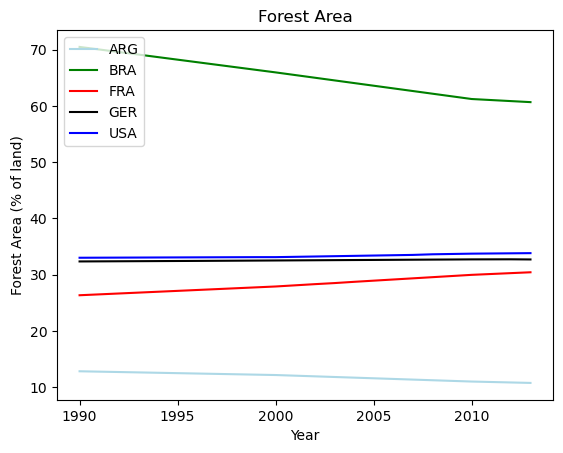

In [160]:
plt.plot(a, b, color='lightblue', label='ARG')
plt.plot(a, c, color='green', label='BRA')
plt.plot(a, d, color='red', label='FRA')
plt.plot(a, e, color='black', label='GER')
plt.plot(a, f, color='blue', label='USA')

plt.title('Forest Area')
plt.ylabel('Forest Area (% of land)')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.show()


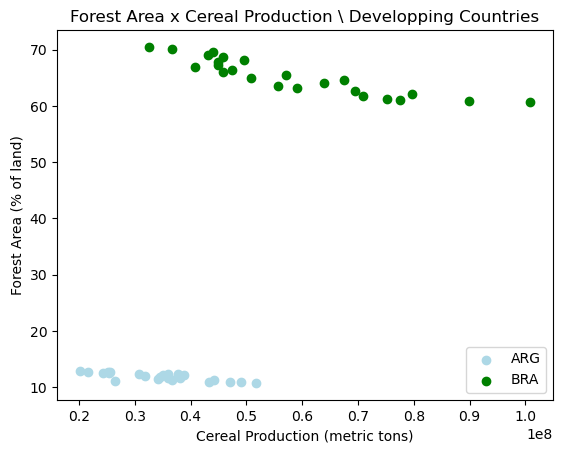

In [161]:
plt.scatter(g, b, color='lightblue', label='ARG')
plt.scatter(h, c, color='green', label='BRA')

plt.title('Forest Area x Cereal Production \ Developping Countries')
plt.xlabel('Cereal Production (metric tons)')
plt.ylabel('Forest Area (% of land)')
plt.legend(loc='lower right')
plt.show()

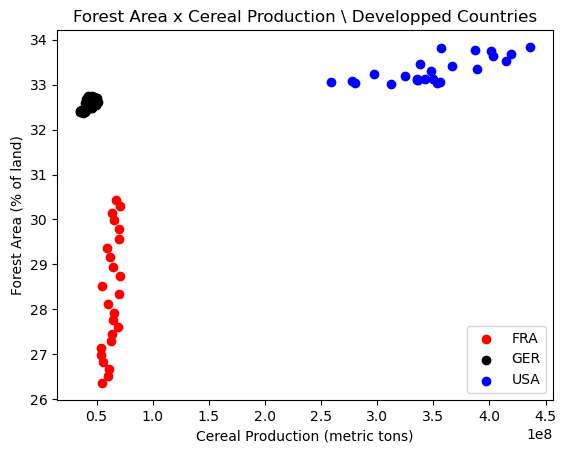

In [162]:
plt.scatter(i, d, color='red', label='FRA')
plt.scatter(j, e, color='black', label='GER')
plt.scatter(k, f, color='blue', label='USA')


plt.title('Forest Area x Cereal Production \ Developped Countries')
plt.xlabel('Cereal Production (metric tons)')
plt.ylabel('Forest Area (% of land)')
plt.legend()
plt.show()

In [163]:
arg_corr = forest_table['ARG'].corr(cereal_table['ARG'])
bra_corr = forest_table['BRA'].corr(cereal_table['BRA'])
fra_corr = forest_table['FRA'].corr(cereal_table['FRA'])
deu_corr = forest_table['DEU'].corr(cereal_table['DEU'])
usa_corr = forest_table['USA'].corr(cereal_table['USA'])

In [164]:
print(arg_corr, bra_corr, fra_corr, deu_corr, usa_corr, sep='\n')

-0.7977783651408344
-0.9100221397618794
0.604173345219267
0.6343936365969526
0.762233936863473
